In [64]:
import pickle as pk
import matplotlib.pyplot as plt
import tensorflow as tf
from cnn import CNN
import numpy as np
model_filepath="../models/vanilla"
model = tf.keras.models.load_model(model_filepath, custom_objects={"loss": CNN.loss})

In [65]:
source = 7
target = 1

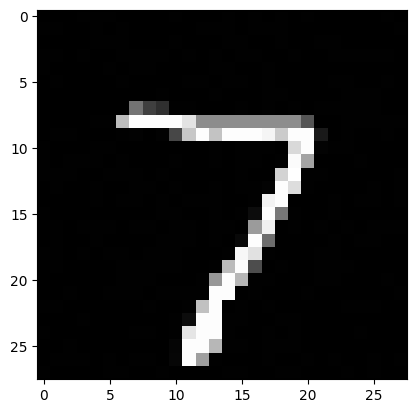

In [66]:
input_filepath=f"../data/{source}p{target}.pk"
with open(input_filepath, "rb") as fd:
    xp = pk.load(fd)
xp = tf.reshape(xp, [1, 28, 28, 1])
plt.imshow(xp[0], cmap='gray')
plt.show()

7


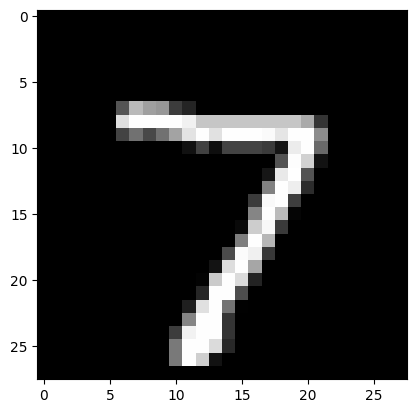

In [67]:
# load MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = (x_train / 255) - 0.5
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_test = (x_test / 255) - 0.5
x_test = np.reshape(x_test, (-1, 28, 28, 1))

# find image that matches source
index = tf.where(y_test == source)[0][0]
print(y_test[index])
plt.imshow(x_test[index], cmap='gray')
plt.show()

In [68]:
# predicting original image
pred = model.predict(x_test)
pred = tf.nn.softmax(pred, axis=1)
pred = np.argmax(pred, axis=1)
print(f"pred {pred[index]}")

313/313 [==============================] - 2s 6ms/step
pred 7


In [69]:
# predicting perturbed image
pred = model.predict(xp)
pred = tf.nn.softmax(pred, axis=1)
pred = np.argmax(pred, axis=1)
print(f"pred {pred}")

1/1 [==============================] - 0s 18ms/step
pred [1]


In [70]:
# write code that creates a plot with original image and the adversarial image with thesamemisclassifiedlabelofl+1(mod10).